In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/boston.csv')

In [3]:
df.head(3)

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        b  lstat  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

In [4]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

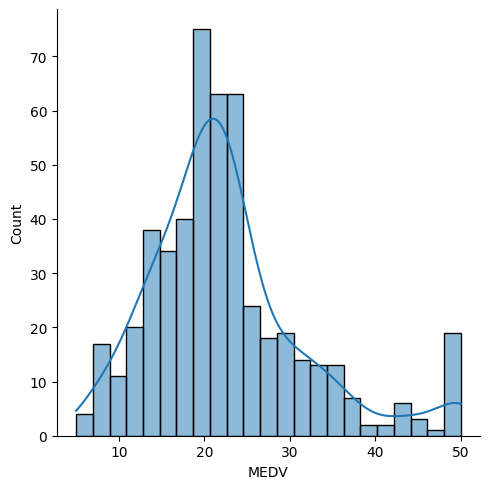

In [8]:
sns.displot(data=df['MEDV'], kde=True)
plt.show()

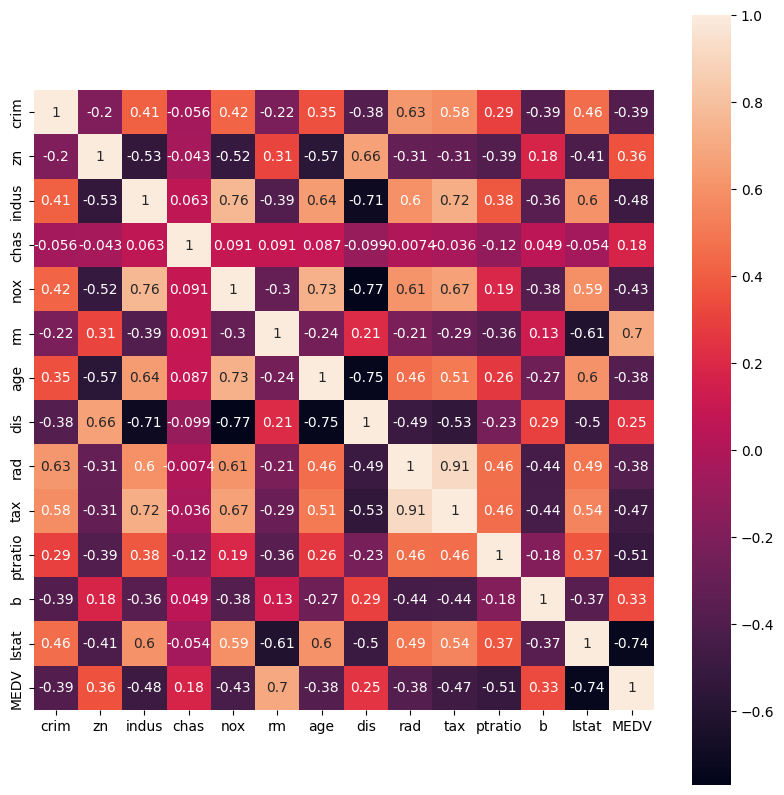

In [9]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True, square=True)
plt.show()

In [10]:
print(corr.MEDV)

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


In [11]:
X = df.iloc[:, :-1]
y = df.MEDV

In [12]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=4)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

2024-04-29 00:20:12.223876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 00:20:12.223920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 00:20:12.224598: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 00:20:12.229726: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 00:20:12.858979: W tensorflow/compiler/tf2

In [15]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9

In [18]:
results = model.fit(x=Xtrain, y=ytrain, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 2ms/step - loss: 551.6253
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 460.8014
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 288.1251
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 143.1080
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 124.7616
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 102.5666
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 106.7060
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 84.6466
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 87.9069
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 93.1349


In [19]:
ypred = model.predict(Xtest)

4/4 [==============================] - 0s 1ms/step


In [20]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", math.sqrt(mse))
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 4.042128671384326
Mean Squared Error (MSE): 33.91587800147585
Root Mean Squared Error (RMSE): 5.823734025646763
R-squared (R2): 0.6348782300247744


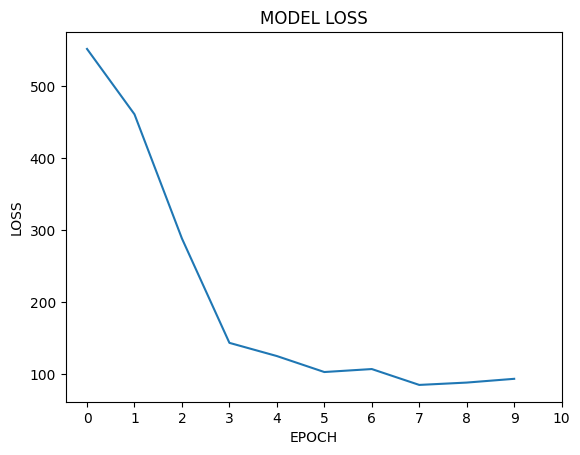

In [21]:
plt.plot(results.history['loss'])
plt.title("MODEL LOSS")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.xticks(np.arange(0, 11))
plt.show()